In [13]:
import numpy as np
from matplotlib import pyplot
from astropy import units as u, constants as c

print(5+5)

10


In [11]:
import ugradio
divisor = 5
sample_freq = (62.5/divisor)*u.Mhz
dt = (1/sample_freq).to(u.ns)
N_samples =1600
times=np.arange(0,N_samples)*dt.to(u.us)
scaling_factor=1.0/np.linfo(np.int16).max
freqs_to_test=np.arange(.1,1.1,.1)*sample_freq
raw_data=np.loadtxt(¨lab_1.csv¨, delimiter=´,´,unppack=True, dtype=np.int16)
data=(((raw_data/(1.0*np.linfo(raw_data[0][0].dtype).max)))*u.V).to(u.mV)
np.unique(raw_data[0])/256

SyntaxError: invalid syntax (<ipython-input-11-418139a96aa9>, line 9)

In [1]:
import ugradio
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
import cmath
%matplotlib inline
#data1 = ugradio.pico.capture_data('500mV', divisor = 5)
#np.save('data9', data1)


/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


This code cell will import all the data that we need for our plotting purposes as well as for when we calculate the DFT, Power and Voltage spectrums.

In [2]:
data1 = np.load('data1.npy')
data2 = np.load('data2.npy')
data3 = np.load('data3.npy')
data4 = np.load('data4.npy')
data5 = np.load('data5.npy')
data6 = np.load('data6.npy')
data7 = np.load('data7.npy')
data8 = np.load('data8.npy')
data9 = np.load('data9.npy')

In [3]:
#defining a variable that will hold our sampling frequency
sampling_frequency = 12.5e6
#this was a test to see if i can make a numpy array from the sampling rate
#and convert that to times in seconds
(1/sampling_frequency) * np.arange(1, 20, 1)

array([  8.00000000e-08,   1.60000000e-07,   2.40000000e-07,
         3.20000000e-07,   4.00000000e-07,   4.80000000e-07,
         5.60000000e-07,   6.40000000e-07,   7.20000000e-07,
         8.00000000e-07,   8.80000000e-07,   9.60000000e-07,
         1.04000000e-06,   1.12000000e-06,   1.20000000e-06,
         1.28000000e-06,   1.36000000e-06,   1.44000000e-06,
         1.52000000e-06])

Frequency has units of s⁻¹ so to get the time in between measurements we need to take the inverse of the sampling frequency to get how long it takes between successive measurements. from this we can create an array of times

TEST PLOTTING CODE

[ 1024  2816  3584 ..., -2816 -2048     0]


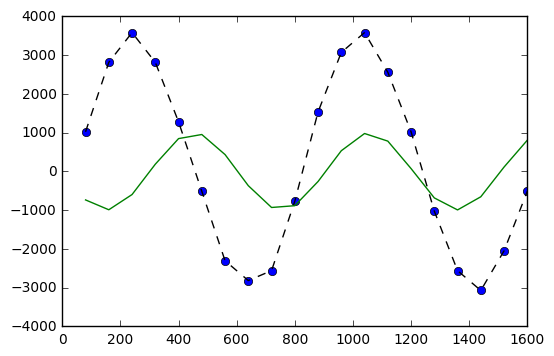

In [46]:

#the actual code to plot the data here I used the first 20 sample times
sampling_frequency = 12.5e6

#in the time_data1 variable I divided the time by 1e⁻9 so that the time 
#in the array is now in nanoseconds
time_data1 = (1/sampling_frequency) * np.arange(1, 1601, 1) * (1/1e-9)

plt.plot(time_data1[:20], data1[:20], 'o')
plt.plot(time_data1[:20], data1[:20], 'k--')

##########################




Plotting Data Voltage vs Time

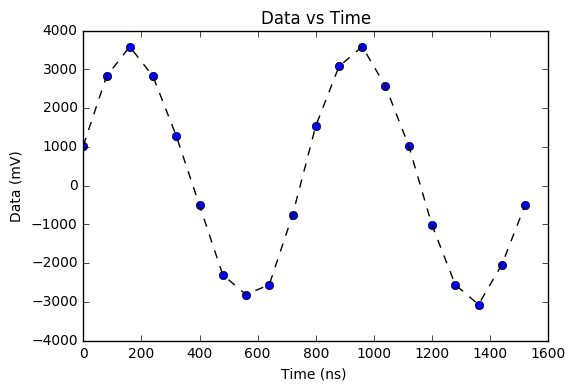

In [25]:
#given that the sampling frequency is fixed we can use this time between
#measurments as constant since all we are changing is the signal frequency
#not the sampling frequency we simply take the inverse to find how many
#seconds between measurements and multiply it by an array going from 
#1 to 16000
sampling_freq = 12.5e6

#in the time_data1 variable I divided the time by 1e⁻9 so that the time 
#in the array is now in nanoseconds
time_data1 = (1/sampling_freq) * np.arange(0, 16001, 1)* (1/1e-9)

#code for plotting
plt.title('Data vs Time')
plt.xlabel('Time (ns) ')
plt.ylabel('Data (mV)')
plt.plot(time_data1[:20], data1[:20], 'o')
plt.plot(time_data1[:20], data1[:20], 'k--')

Using the below code cells to work on the fft/dft

Suggestions: make N even(a power of two) I say we can use N = 32

In the documentation for the dft function we need to specify xt which is the function we have in the fourier transform this is eqn. 1 in section 5. I believe all that we have to do is multiply the voltages or electric field by the complex exponential term.

-The time range is another parameter we need to input and for that we need to make an array that has len 32 and make sure to make the starting point (-N/(2v_samp)) to ((N/2)-1)/(v_samp) with N = 32 and v_samp = 12.5MHz

-There is also an output frequency that we have to specify in the function and for that we have to calculate the first N frequencies running from -v_samp/2 to v_samp/2(1-(2/N)). Again here v_samp = 12.5MHz and N = 32


In [75]:
N = 2**7
#print(N)
firstN_data1 = data1[:N]

Making the time array

In [76]:
start_time = -(N/2)/sampling_freq
end_time = ((N/2) - 1)/sampling_freq
time_array = np.linspace(start_time, end_time, num = N)
#print(time_array)

Making the frequency array 

In [77]:
starting_freq = -sampling_freq/2
ending_freq = (sampling_freq/2)*(1-(2/N))
freq_arr = np.linspace(starting_freq, ending_freq, num = N)
#print(freq_arr)

#print(abs(freq_arr[3]- freq_arr[4]))
#print(abs(freq_arr[6]- freq_arr[7]))
#print(sampling_freq/N)


Calculating the xt(complex integrand) in fourier transform 

ValueError: operands could not be broadcast together with shapes (32,) (128,) 

In [50]:
ugradio.dft??

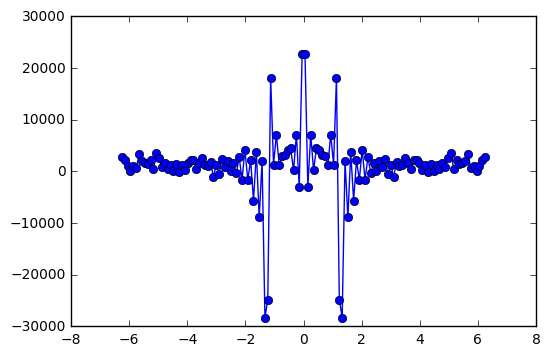

In [79]:
#test
fft_test = ugradio.dft.dft(firstN_data1, t = time_array, f = freq_arr)
#print(fft_test)

plt.plot(fft_test[0]/(1e6), fft_test[1], '-o')

In [16]:
fft_data1 = ugradio.dft.dft(integrand, t = time_array, f = freq_arr)
print(fft_data1)

(array([-6250000.        , -5846774.19354839, -5443548.38709677,
       -5040322.58064516, -4637096.77419355, -4233870.96774194,
       -3830645.16129032, -3427419.35483871, -3024193.5483871 ,
       -2620967.74193548, -2217741.93548387, -1814516.12903226,
       -1411290.32258064, -1008064.51612903,  -604838.70967742,
        -201612.90322581,   201612.90322581,   604838.70967742,
        1008064.51612903,  1411290.32258064,  1814516.12903226,
        2217741.93548387,  2620967.74193548,  3024193.5483871 ,
        3427419.35483871,  3830645.16129032,  4233870.96774194,
        4637096.77419355,  5040322.58064516,  5443548.38709677,
        5846774.19354839,  6250000.        ]), array([    34.86465439 -6083.43380555j,  -9848.04395059+10817.69351654j,
         8851.33853023-14436.43803569j,  -6191.91744840+12688.47121027j,
        -2895.20817781 -5989.66698583j,  -4619.79960817 -5155.82469156j,
        14468.56791269 +3542.32802844j, -18940.86674828+11153.60185071j,
        -4120.986956

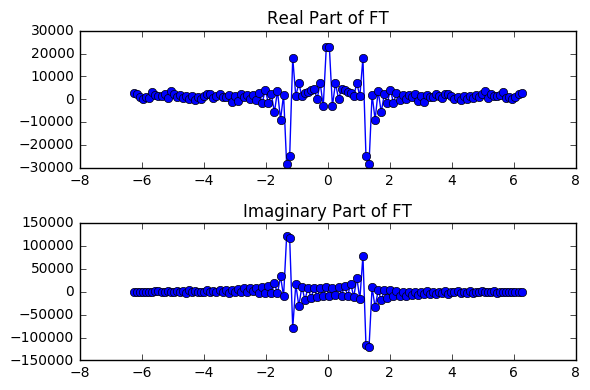

In [73]:
plt.subplot(211)
plt.title('Real Part of FT')
plt.plot(fft_test[0]/1e6, fft_test[1].real, '-o')
plt.subplot(212)
plt.title('Imaginary Part of FT')
plt.plot(fft_test[0]/1e6, fft_test[1].imag, '-o')
plt.tight_layout()

Making Power Spectrum

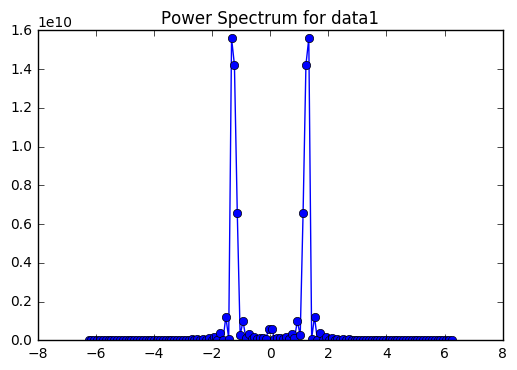

In [74]:
power_spec = np.abs(fft_test[1])**2

plt.title('Power Spectrum for data1')
plt.plot(freq_arr/1e6, power_spec, '-o')

In [ ]:
N = 2**7
#print(N)
firstN_data1 = data1[:N]

start_time = -(N/2)/sampling_freq
end_time = ((N/2) - 1)/sampling_freq
time_array = np.linspace(start_time, end_time, num = N)

starting_freq = -sampling_freq/2
ending_freq = (sampling_freq/2)*(1-(2/N))
freq_arr = np.linspace(starting_freq, ending_freq, num = N)

fft_data1 = ugradio.dft.dft(firstN_data1, t = time_array, f = freq_arr)
#print(fft_test)

plt.title('Fourier Transform for Data1)
plt.xlabel('Frequency (MHz))
plt.plot(fft_data1[0]/(1e6), fft_test[1], '-o')